<span style="color:#1B65F1;font-weight:600;font-size:30px"> 
JSON Aggregation Tool - Cosmic AI Parallel Runs
</span> <br>
The following notebook assists with pulling together Cosmic AI Parallel Performance Reports from Json files in Amazon S3. 

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import sys
import os
from io import StringIO
sys.tracebacklimit = 0 # turn off the error tracebacks

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/AlfHaugen/Python/Code/6 UVA/5110 Big Data Systems/DS5110_Fall_2024/Team 1'

## **Single File Review**

In [9]:
for u in results_dict:
    print(u)

total_cpu_time (seconds)
total_cpu_memory (MB)
execution_time (seconds/batch)
num_batches
batch_size
device
throughput_bps
sample_persec
result_path
data_path


The JSON string you provided is valid, but pd.read_json is not the right tool for this structure because it is a single JSON object rather than an array of objects. pd.read_json expects either a JSON array or a JSON object with lists as values.

To handle this JSON structure and create a DataFrame, use pd.DataFrame.from_dict or convert it into a list of dictionaries.

<div style="border-top: 8px solid #16145b; margin-top: 10px; margin-bottom: 10px;"></div>

## **Multi-Json Folder Dataframe**
- Iterate through the various folders holding each Parallel Run to combine results. 

In [140]:
### One Time set
all_parallel_runs_df = pd.DataFrame()

In [162]:
# Define the folder path containing JSON files and Iterate Through to create DF below. 
# filename_prefix = '25_10_'
# folder_path = '/Users/AlfHaugen/Python/Code/6 UVA/5110 Big Data Systems/Project/Cosmic_AI_Para_Runs_25_10'
# filename_prefix = '25_40_'
# folder_path = '/Users/AlfHaugen/Python/Code/6 UVA/5110 Big Data Systems/Project/Cosmic_AI_Para_Runs_25_40'
# filename_prefix = '25_80_'
# folder_path = '/Users/AlfHaugen/Python/Code/6 UVA/5110 Big Data Systems/Project/Cosmic_AI_Para_Runs_25_80'
filename_prefix = '25_120_'
folder_path = '/Users/AlfHaugen/Python/Code/6 UVA/5110 Big Data Systems/Project/Cosmic_AI_Para_Runs_25_120'

# Initialize an empty list to store DataFrames
dataframes_list = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  # Check if the file is a JSON file
        file_path = os.path.join(folder_path, filename)

        ## Extract text
        with open(file_path, 'r', encoding='utf-8') as file:
            json_text = file.read()  # Read the file as plain text

        ## Turn json text into a dict that pandas can read. 
        results_dict = json.loads(json_text)
        results_df = pd.DataFrame([results_dict])  # Wrap the dictionary in a list
        
        # json_IOString = StringIO(json_text) ## Turn text into an IOString so that you can read into DF.
        # results_df = pd.read_json(json_IOString)
        filename_new = filename_prefix + filename
        print(filename_new)
        # results_df.index = [filename_new]*len(results_df)
        results_df.index = [filename_new]
        # results_df = results_df.iloc[[0]]
        # results_df = results_df.set_index(filename)
        dataframes_list.append(results_df)  # Append the DataFrame to the list
        
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes_list, ignore_index=False)


25_120_115.json
25_120_103.json
25_120_20.json
25_120_98.json
25_120_77.json
25_120_61.json
25_120_36.json
25_120_119.json
25_120_41.json
25_120_16.json
25_120_57.json
25_120_94.json
25_120_82.json
25_120_6.json
25_120_7.json
25_120_83.json
25_120_95.json
25_120_56.json
25_120_17.json
25_120_118.json
25_120_40.json
25_120_37.json
25_120_60.json
25_120_99.json
25_120_76.json
25_120_21.json
25_120_102.json
25_120_114.json
25_120_47.json
25_120_10.json
25_120_109.json
25_120_51.json
25_120_92.json
25_120_84.json
25_120_0.json
25_120_113.json
25_120_105.json
25_120_26.json
25_120_71.json
25_120_88.json
25_120_67.json
25_120_30.json
25_120_31.json
25_120_89.json
25_120_66.json
25_120_70.json
25_120_27.json
25_120_104.json
25_120_112.json
25_120_1.json
25_120_85.json
25_120_93.json
25_120_108.json
25_120_50.json
25_120_11.json
25_120_46.json
25_120_69.json
25_120_2.json
25_120_86.json
25_120_90.json
25_120_28.json
25_120_53.json
25_120_12.json
25_120_45.json
25_120_32.json
25_120_65.json
25_

In [163]:
## Review of the items captured in the dataframes list. 
dataframes_list[0]

,total_cpu_time (seconds),total_cpu_memory (MB),execution_time (seconds/batch),num_batches,batch_size,device,throughput_bps,sample_persec,result_path,data_path
25_120_115.json,6.894288,17864.672524,2.762031,3,512,cpu,3.043048e+07,185.370834,result-partition-25MB/,25MB/202.pt


In [185]:
print(combined_df.shape)
combined_df.head(5)

(120, 11)


,inference_run,total_cpu_time (seconds),total_cpu_memory (MB),execution_time (seconds/batch),num_batches,batch_size,device,throughput_bps,sample_persec,result_path,data_path
25_120_115.json,25_12,6.894288,17864.672524,2.762031,3,512,cpu,3.043048e+07,185.370834,result-partition-25MB/,25MB/202.pt
25_120_103.json,25_12,7.262806,17864.672532,2.909669,3,512,cpu,2.888642e+07,175.965044,result-partition-25MB/,25MB/192.pt
25_120_20.json,25_12,6.874824,17864.672524,2.754233,3,512,cpu,3.051663e+07,185.895662,result-partition-25MB/,25MB/117.pt
25_120_98.json,25_12,17.450352,17864.672524,6.991064,3,512,cpu,1.202248e+07,73.236344,result-partition-25MB/,25MB/188.pt
25_120_77.json,25_12,6.452479,17864.672524,2.585031,3,512,cpu,3.251409e+07,198.063406,result-partition-25MB/,25MB/169.pt


In [165]:
# combined_df['inference_run'] = combined_df.index.str[:5]
combined_df.insert(0, "inference_run", combined_df.index.str[:5])
combined_df.head()

,inference_run,total_cpu_time (seconds),total_cpu_memory (MB),execution_time (seconds/batch),num_batches,batch_size,device,throughput_bps,sample_persec,result_path,data_path
25_120_115.json,25_12,6.894288,17864.672524,2.762031,3,512,cpu,3.043048e+07,185.370834,result-partition-25MB/,25MB/202.pt
25_120_103.json,25_12,7.262806,17864.672532,2.909669,3,512,cpu,2.888642e+07,175.965044,result-partition-25MB/,25MB/192.pt
25_120_20.json,25_12,6.874824,17864.672524,2.754233,3,512,cpu,3.051663e+07,185.895662,result-partition-25MB/,25MB/117.pt
25_120_98.json,25_12,17.450352,17864.672524,6.991064,3,512,cpu,1.202248e+07,73.236344,result-partition-25MB/,25MB/188.pt
25_120_77.json,25_12,6.452479,17864.672524,2.585031,3,512,cpu,3.251409e+07,198.063406,result-partition-25MB/,25MB/169.pt


<div style="border-top: 8px solid #16145b; margin-top: 10px; margin-bottom: 10px;"></div>

## **Combine Dataframes**

#### Initialize this above:
all_parallel_runs_df = pd.DataFrame()

In [166]:
## Save to new DF after each folder load
# result = pd.concat([df1, df2], axis=1)
all_parallel_runs_df = pd.concat([all_parallel_runs_df, combined_df], axis=0, ignore_index=False)
all_parallel_runs_df.shape

(250, 11)

In [167]:
all_parallel_runs_df.head()

,inference_run,total_cpu_time (seconds),total_cpu_memory (MB),execution_time (seconds/batch),num_batches,batch_size,device,throughput_bps,sample_persec,result_path,data_path
25_10_6.json,25_10,6.553163,17864.672532,2.625368,3,512,cpu,3.201453e+07,195.020315,result-partition-25MB/,25MB/104.pt
25_10_7.json,25_10,7.087232,17864.672524,2.839329,3,512,cpu,2.960203e+07,180.324287,result-partition-25MB/,25MB/105.pt
25_10_0.json,25_10,6.661401,17864.672524,2.668730,3,512,cpu,3.149435e+07,191.851531,result-partition-25MB/,25MB/1.pt
25_10_1.json,25_10,7.899756,17864.672540,3.164847,3,512,cpu,2.655734e+07,161.777154,result-partition-25MB/,25MB/10.pt
25_10_2.json,25_10,7.423856,17864.672524,2.974190,3,512,cpu,2.825977e+07,172.147726,result-partition-25MB/,25MB/100.pt


In [171]:
result_group = all_parallel_runs_df.groupby('inference_run')[all_parallel_runs_df.select_dtypes(include="number").columns].mean()
result_group = result_group.sort_values(by="total_cpu_time (seconds)", ascending=True)  # Sort in ascending order
result_group

,total_cpu_time (seconds),total_cpu_memory (MB),execution_time (seconds/batch),num_batches,batch_size,throughput_bps,sample_persec
inference_run,,,,,,,
25_10,7.161042,17864.672526,2.868899,3.0,512.0,2.947414e+07,179.545187
25_40,7.340410,17864.669247,2.940759,3.0,512.0,2.934134e+07,178.736233
25_80,7.500310,17864.672525,3.004819,3.0,512.0,2.839099e+07,172.947039
25_12,8.788115,17864.672081,3.520747,3.0,512.0,2.658208e+07,161.927884


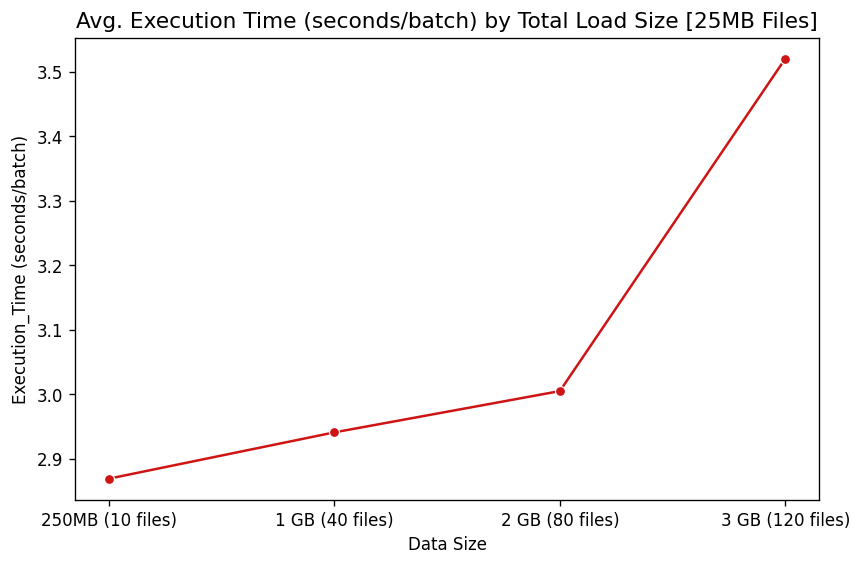

In [183]:
# Create a line plot
plt.figure(figsize=(8, 5), dpi=120)  # Optional: Set figure size
sns.lineplot(data=result_group, x=result_group.index, y="execution_time (seconds/batch)", 
      marker='o', color='#cf1414')  # Line plot with category distinction

# plt.scatter(
#     x=result_group.index,
#     y=result_group["total_cpu_time (seconds)"],
#     color="#0f17bd",  # Set marker color to blue
#     label="Markers",  # Add legend for markers
# )

# Customize the plot
plt.title("Avg. Execution Time (seconds/batch) by Total Load Size [25MB Files]",  fontsize=13)
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Execution_Time (seconds/batch)", fontsize=10)
plt.grid(False)
# plt.legend(title="Category", loc="upper left")

custom_labels = ["250MB (10 files)", "1 GB (40 files)", "2 GB (80 files)", "3 GB (120 files)"]  # Your custom labels
plt.xticks(ticks=range(len(result_group.index)), labels=custom_labels, rotation=0)

# Show the plot
plt.show()

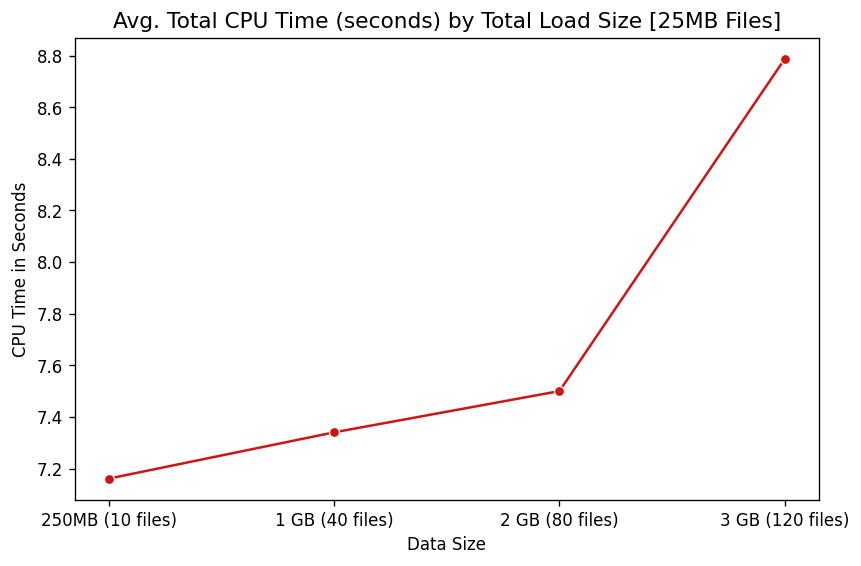

In [176]:
# Create a line plot
plt.figure(figsize=(8, 5), dpi=120)  # Optional: Set figure size
sns.lineplot(data=result_group, x=result_group.index, y="total_cpu_time (seconds)", 
      marker='o', color='#cf1414')  # Line plot with category distinction

# plt.scatter(
#     x=result_group.index,
#     y=result_group["total_cpu_time (seconds)"],
#     color="#0f17bd",  # Set marker color to blue
#     label="Markers",  # Add legend for markers
# )

# Customize the plot
plt.title("Avg. Total CPU Time (seconds) by Total Load Size [25MB Files]", fontsize=13)
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("CPU Time in Seconds", fontsize=10)
plt.grid(False)
# plt.legend(title="Category", loc="upper left")

custom_labels = ["250MB (10 files)", "1 GB (40 files)", "2 GB (80 files)", "3 GB (120 files)"]  # Your custom labels
plt.xticks(ticks=range(len(result_group.index)), labels=custom_labels, rotation=0)

# Show the plot
plt.show()

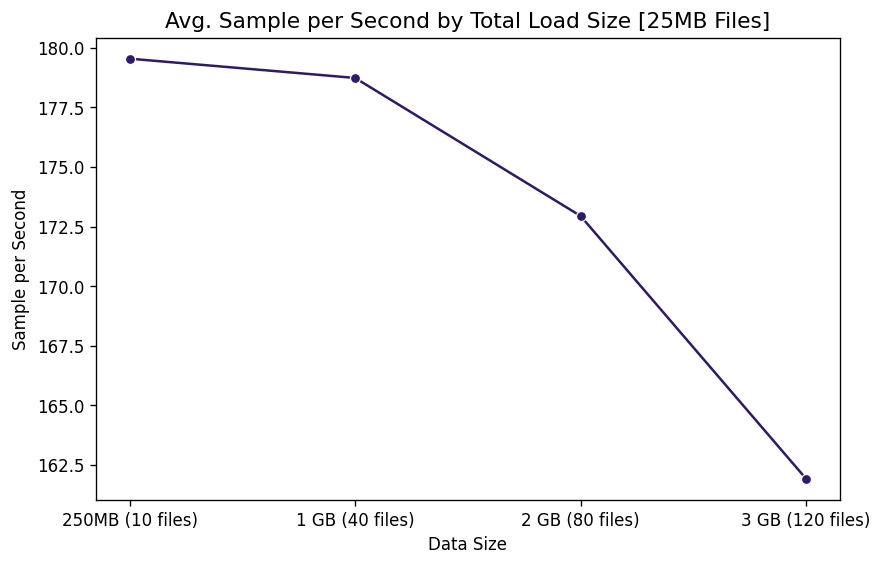

In [180]:
# Create a line plot
plt.figure(figsize=(8, 5), dpi=120)  # Optional: Set figure size
sns.lineplot(data=result_group, x=result_group.index, y="sample_persec", 
      marker='o', color='#2f1968')  # Line plot with category distinction

# plt.scatter(
#     x=result_group.index,
#     y=result_group["total_cpu_time (seconds)"],
#     color="#0f17bd",  # Set marker color to blue
#     label="Markers",  # Add legend for markers
# )

# Customize the plot
plt.title("Avg. Sample per Second by Total Load Size [25MB Files]", fontsize=13)
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Sample per Second", fontsize=10)
plt.grid(False)
# plt.legend(title="Category", loc="upper left")

custom_labels = ["250MB (10 files)", "1 GB (40 files)", "2 GB (80 files)", "3 GB (120 files)"]  # Your custom labels
plt.xticks(ticks=range(len(result_group.index)), labels=custom_labels, rotation=0)

# Show the plot
plt.show()

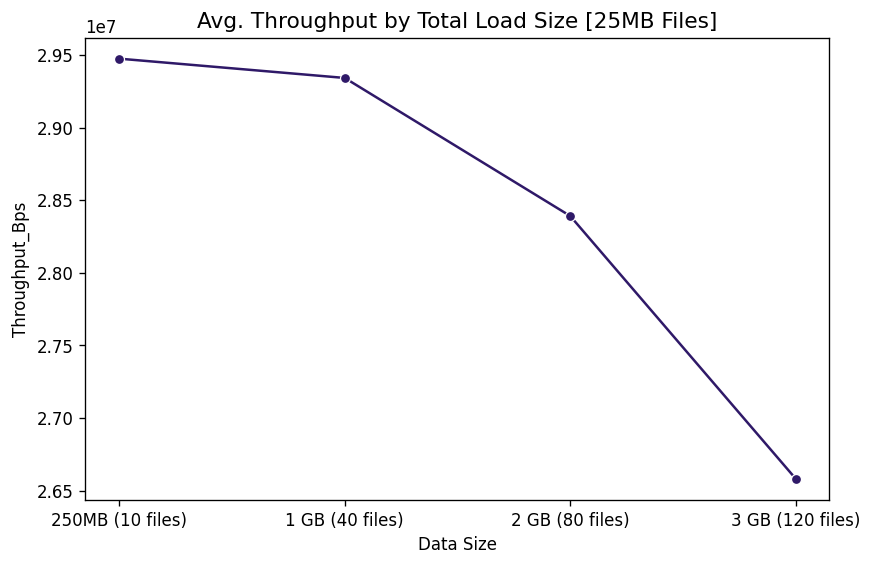

In [184]:
# Create a line plot
plt.figure(figsize=(8, 5), dpi=120)  # Optional: Set figure size
sns.lineplot(data=result_group, x=result_group.index, y="throughput_bps", 
      marker='o', color='#2f1968')  # Line plot with category distinction

# plt.scatter(
#     x=result_group.index,
#     y=result_group["total_cpu_time (seconds)"],
#     color="#0f17bd",  # Set marker color to blue
#     label="Markers",  # Add legend for markers
# )

# Customize the plot
plt.title("Avg. Throughput by Total Load Size [25MB Files]", fontsize=13)
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Throughput_Bps", fontsize=10)
plt.grid(False)
# plt.legend(title="Category", loc="upper left")

custom_labels = ["250MB (10 files)", "1 GB (40 files)", "2 GB (80 files)", "3 GB (120 files)"]  # Your custom labels
plt.xticks(ticks=range(len(result_group.index)), labels=custom_labels, rotation=0)

# Show the plot
plt.show()

**Past Trials**